# Shritesh_Jagtap_Data_Science_Project_on_Time_Series

## let’s take a look at bicycle counts on Seattle’s Fremont Bridge. This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller,acf,pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

In [2]:
bridge=pd.read_csv('fremont-bridge.csv', parse_dates=['Date'])
bridge

,Date,West,East
0,2012-10-03 00:00:00,4.0,9.0
1,2012-10-03 01:00:00,4.0,6.0
2,2012-10-03 02:00:00,1.0,1.0
3,2012-10-03 03:00:00,2.0,3.0
4,2012-10-03 04:00:00,6.0,1.0
...,...,...,...
45979,2017-12-31 19:00:00,9.0,12.0
45980,2017-12-31 20:00:00,6.0,8.0
45981,2017-12-31 21:00:00,3.0,10.0
45982,2017-12-31 22:00:00,7.0,6.0


In [3]:
bridge.isnull().sum()

Date    0
West    8
East    8
dtype: int64

In [4]:
bridge['West']=bridge['West'].fillna(bridge['West'].median())
bridge['East']=bridge['East'].fillna(bridge['East'].median())

In [5]:
bridge.isnull().sum()

Date    0
West    0
East    0
dtype: int64

In [6]:
df=bridge.copy()

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df = df.set_index('Date')

In [9]:
b = df['West'].resample('M').mean()

<AxesSubplot:xlabel='Date'>

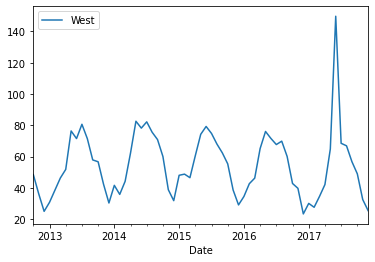

In [10]:
b.plot(legend='West')


In [11]:
data=df[['West']]

In [12]:
data

,West
Date,
2012-10-03 00:00:00,4.0
2012-10-03 01:00:00,4.0
2012-10-03 02:00:00,1.0
2012-10-03 03:00:00,2.0
2012-10-03 04:00:00,6.0
...,...
2017-12-31 19:00:00,9.0
2017-12-31 20:00:00,6.0
2017-12-31 21:00:00,3.0


Text(0.5, 1.0, 'Random')

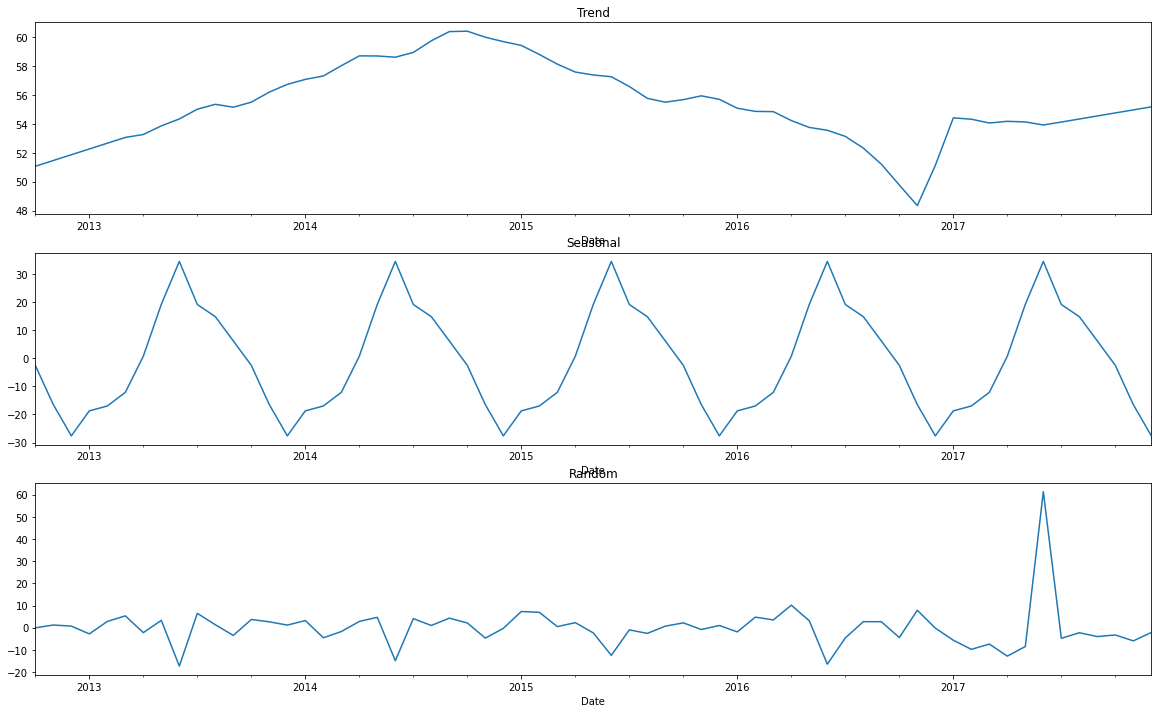

In [14]:
# seasonal_decompose(train_df, period=52, extrapolate_trend='freq').plot();
# plotting all the 4 graphs
fig,ax = plt.subplots(3,1,figsize=(20,12))

result = seasonal_decompose(b, period=12, extrapolate_trend='freq')

# result.trend.plot(figsize=(8,6),ax=ax[0])
result.trend.plot(ax=ax[0])
ax[0].set_title("Trend")

result.seasonal.plot(ax=ax[1])
ax[1].set_title("Seasonal")

result.resid.plot(ax=ax[2])
ax[2].set_title("Random")

# result.observed.plot(ax=ax[3])
# ax[3].set_title("Actual")

In [15]:
def checkStationarity(b):
    pvalue = adfuller(b)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return(msg)

In [16]:
checkStationarity(b)

'pvalue=1.964989784021364e-06. Data is Stationary. Proceed to model building'

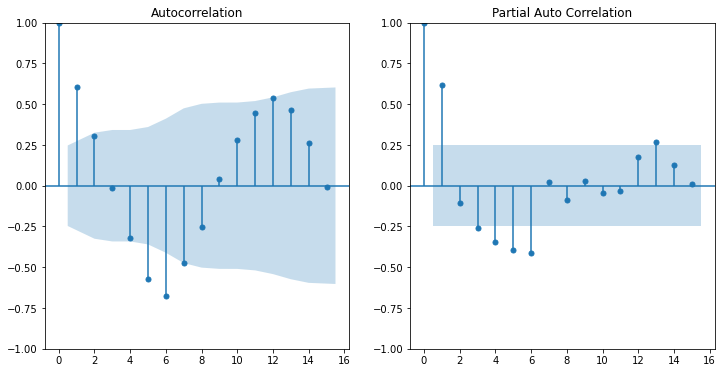

In [17]:
# ACF and PACF plots
ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(b, lags=15, ax=ax[0])
plt.title("Auto Correlation")

plot_pacf(b, lags=15, ax=ax[1])
plt.title("Partial Auto Correlation")

plt.show()

In [18]:
ss = int(0.70 * len(b))
train =b.iloc[:ss]
test = b.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 44, test = 19


In [20]:
m1 = auto_arima(b,start_p=0,max_p=12,d=0, start_q=0,max_q=12, seasonal=True, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=566.104, Time=0.84 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=538.564, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=545.926, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=693.537, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=539.976, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=540.229, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=526.444, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=524.603, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=537.720, Time=0.11 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=519.434, Time=0.21 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=532.383, Time=0.11 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=520.556, Time=0.26 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=544.205, Time=0.21 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=524.722, 

In [23]:
AIC=[]
BIC=[]
MSE=[]
RMSE=[]


start = len(train) 
end = len(train) + 11
p=4; q=1
m1 = sm.tsa.statespace.SARIMAX(train,order=(p,0,q),seasonal_order=(p,0,q,12)).fit()
fcast=m1.fittedvalues
AIC.append(m1.aic)
BIC.append(m1.bic)
MSE.append(mean_squared_error(train,fcast))
RMSE.append(np.sqrt(MSE))


print(m1.summary())

D:\A\python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                               West   No. Observations:                   44
Model:             SARIMAX(4, 0, 1)x(4, 0, 1, 12)   Log Likelihood                -147.015
Date:                            Fri, 03 Feb 2023   AIC                            316.029
Time:                                    22:29:42   BIC                            335.655
Sample:                                10-31-2012   HQIC                           323.308
                                     - 05-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7175      0.481      3.568      0.000       0.774       2.661
ar.L2         -0.7863      0.535   

In [24]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [25]:
fcast_off=m1.predict(start,end,typ='levels')

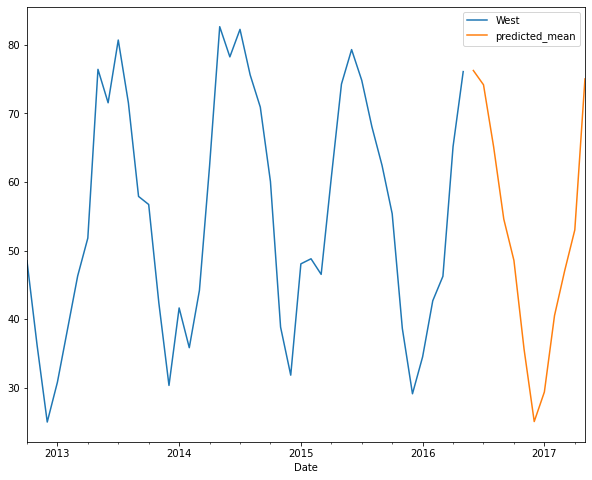

In [26]:
train.plot(figsize=(10,8),legend=True)
fcast_off.plot(legend=True)


plt.show()

## EAST

In [27]:
c = df['East'].resample('M').mean()

<AxesSubplot:xlabel='Date'>

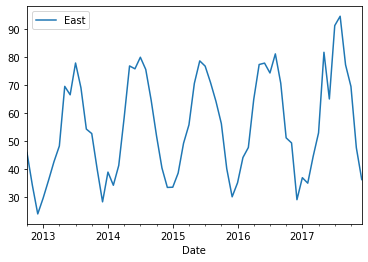

In [28]:
c.plot(legend='East')

In [29]:
data=df[['East']]

Text(0.5, 1.0, 'Random')

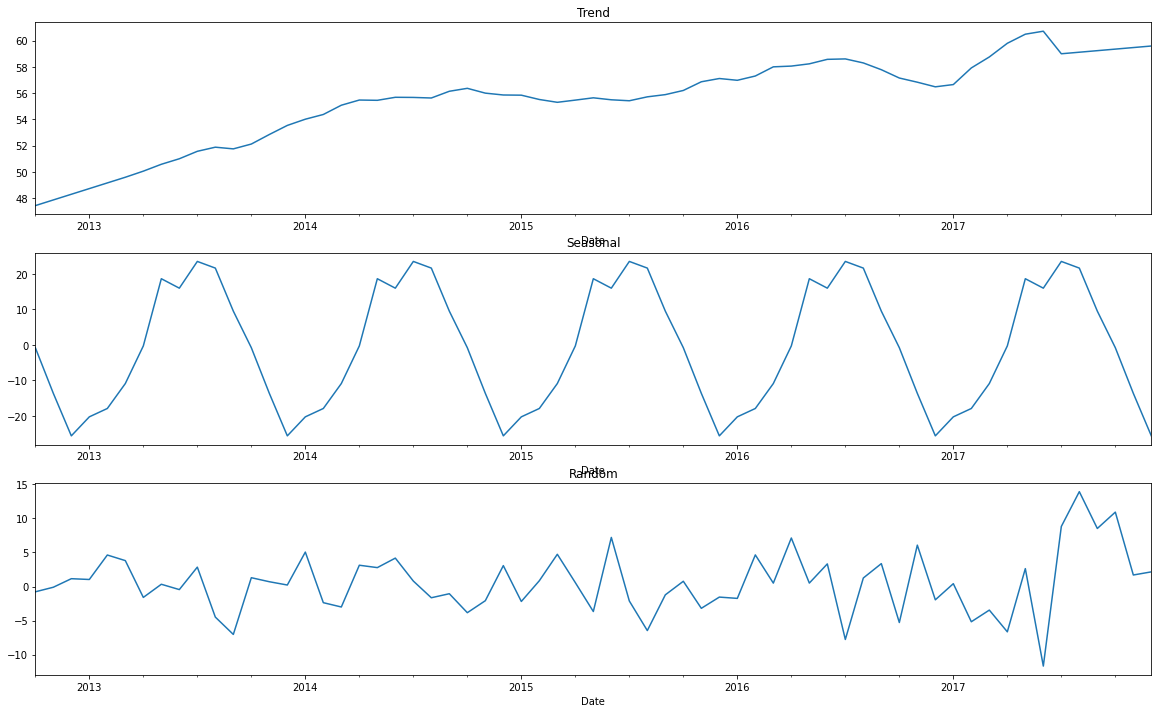

In [30]:
# seasonal_decompose(train_df, period=52, extrapolate_trend='freq').plot();
# plotting all the 4 graphs
fig,ax = plt.subplots(3,1,figsize=(20,12))

result = seasonal_decompose(c, period=12, extrapolate_trend='freq')

# result.trend.plot(figsize=(8,6),ax=ax[0])
result.trend.plot(ax=ax[0])
ax[0].set_title("Trend")

result.seasonal.plot(ax=ax[1])
ax[1].set_title("Seasonal")

result.resid.plot(ax=ax[2])
ax[2].set_title("Random")

# result.observed.plot(ax=ax[3])
# ax[3].set_title("Actual")

In [31]:
def checkStationarity(c):
    pvalue = adfuller(c)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return(msg)

In [32]:
checkStationarity(c)

'pvalue=0.5464479059433727. Data is not Stationary. Make the data stationary before model building'

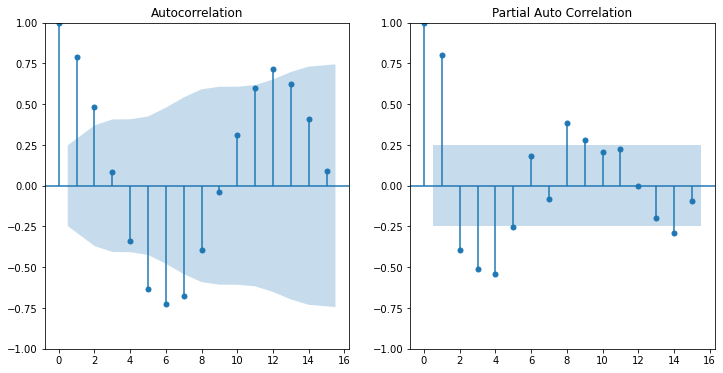

In [33]:
# ACF and PACF plots
ROWS = 1; COLS = 2
fig,ax = plt.subplots(ROWS,COLS,figsize=(12,6))
plot_acf(c, lags=15, ax=ax[0])
plt.title("Auto Correlation")

plot_pacf(c, lags=15, ax=ax[1])
plt.title("Partial Auto Correlation")

plt.show()

In [34]:
ss = int(0.70 * len(b))
train1 =c.iloc[:ss]
test1 = c.iloc[ss:]
print("train = {}, test = {}".format(len(train1), len(test1)))

train = 44, test = 19


In [42]:
m2 = auto_arima(c,start_p=5,max_p=20,d=1, start_q=5,max_q=20, seasonal=True, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=411.153, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=484.614, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=482.841, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=484.130, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=482.626, Time=0.01 sec
 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=419.127, Time=0.34 sec
 ARIMA(6,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(5,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=413.571, Time=0.26 sec
 ARIMA(4,1,6)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(6,1,4)(0,0,0)[0] intercept   : AIC=415.730, Time=0.36 sec
 ARIMA(6,1,6)(0,0,0)[0] intercept   : AIC=416.072, Time=0.37 sec
 ARIMA(5,1,5)(0,0,0)[0]             : AIC=416.023, Time=0.31 sec

Best model:  ARIMA(5,1,5)(0,0,0)[0] intercept
Total fit time: 

In [43]:
AIC1=[]
BIC1=[]
MSE1=[]
RMSE1=[]


start = len(train1) 
end = len(train1) + 11
p=5; q=5
m2 = sm.tsa.statespace.SARIMAX(train1,order=(p,1,q),seasonal_order=(p,1,q,12)).fit()
fcast1=m2.fittedvalues
AIC1.append(m2.aic)
BIC1.append(m2.bic)
MSE1.append(mean_squared_error(train1,fcast1))
RMSE1.append(np.sqrt(MSE1))


print(m2.summary())

D:\A\python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                               East   No. Observations:                   44
Model:             SARIMAX(5, 1, 5)x(5, 1, 5, 12)   Log Likelihood                 -79.608
Date:                            Fri, 03 Feb 2023   AIC                            201.215
Time:                                    22:43:44   BIC                            231.329
Sample:                                10-31-2012   HQIC                           211.031
                                     - 05-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5716      9.058     -0.063      0.950     -18.325      17.182
ar.L2          0.6329     22.247   

In [44]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m2.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [45]:
fcast_off1=m2.predict(start,end,typ='levels')

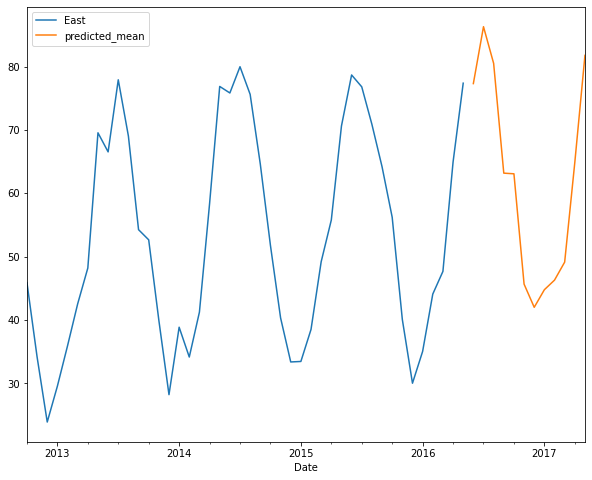

In [46]:
train1.plot(figsize=(10,8),legend=True)
fcast_off1.plot(legend=True)


plt.show()

## COMBINING TWO PREDICTIONS

In [50]:
f = pd.DataFrame({'Date':b.index, 'West':b.values})
f=f.reset_index(drop=True)
o = pd.DataFrame({'Date': c.index, 'East': c.values})
o=o.reset_index(drop=True)



S = pd.merge(f,o, on = 'Date',how = 'inner')

S.head()

,Date,West,East
0,2012-10-31,48.511494,45.877874
1,2012-11-30,36.197222,34.145833
2,2012-12-31,25.010753,23.872312
3,2013-01-31,30.793011,29.534946
4,2013-02-28,38.538690,35.906250


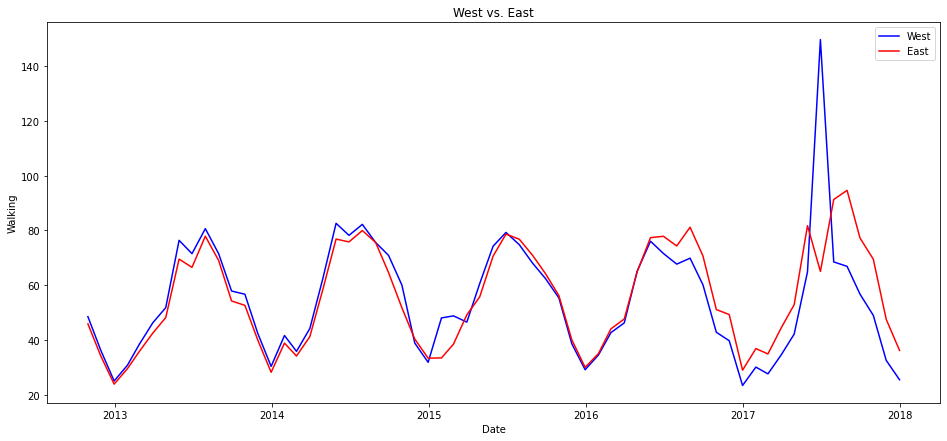

In [52]:
plt.figure(figsize = (16, 7))
plt.plot(S['Date'], S['West'], 'b-', label = 'West')
plt.plot(S['Date'], S['East'], 'r-', label = 'East')
plt.xlabel('Date')
plt.ylabel('Walking')
plt.title('West vs. East')
plt.legend()
plt.show()

### Conclusion:
Considering Actual Bicycle Count \
It can be concluded that Bicycle Counts are same for Both East and West sidewalks of the bridge over the periods But for period between 2017-2018 the Bicycle Count is Higher for West sidewalks of the bridge than East(for common dates) 


## FUTURE PRED

In [53]:
f = pd.DataFrame({'Date':fcast_off.index, 'West':fcast_off.values})
f=f.reset_index(drop=True)
o = pd.DataFrame({'Date': fcast_off1.index, 'East': fcast_off1.values})
o=o.reset_index(drop=True)



S = pd.merge(f,o, on = 'Date',how = 'inner')

S.head()

,Date,West,East
0,2016-06-30,76.227758,77.306807
1,2016-07-31,74.147371,86.291315
2,2016-08-31,65.095617,80.495807
3,2016-09-30,54.574809,63.167468
4,2016-10-31,48.552149,63.065770


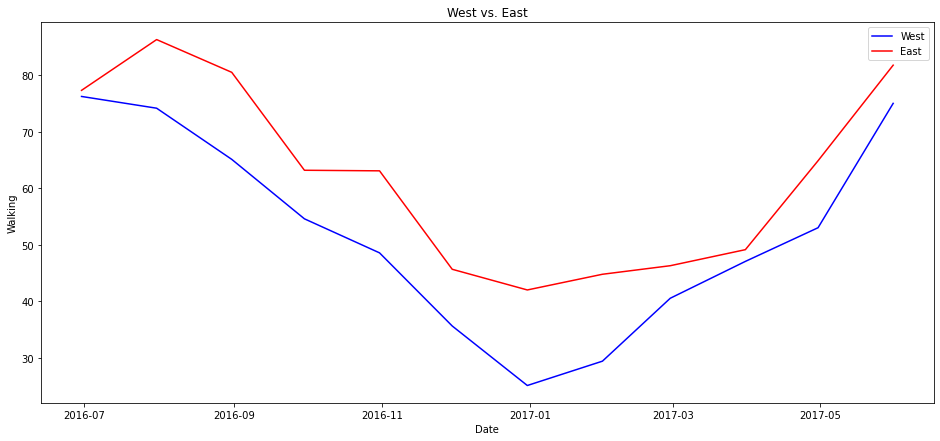

In [54]:
plt.figure(figsize = (16, 7))
plt.plot(S['Date'], S['West'], 'b-', label = 'West')
plt.plot(S['Date'], S['East'], 'r-', label = 'East')
plt.xlabel('Date')
plt.ylabel('Walking')
plt.title('West vs. East')
plt.legend()
plt.show()

### Conclusion:
Considering Future Predicted Bicycle Count \
It can be concluded that Bicycle Count for East sidewalks of the bridge will be Higher than West sidewalks of the bridge (for common dates)
